In [1]:
%cd ..

/home/work/AnacondaProjects/categorical_bpl


In [2]:
import argparse
import collections
import pyro
import torch
import numpy as np
import data_loader.data_loaders as module_data
import model.model as module_arch
from parse_config import ConfigParser
from trainer import Trainer

In [3]:
%matplotlib inline

In [4]:
pyro.enable_validation(True)
torch.autograd.set_detect_anomaly(True)

In [5]:
# fix random seeds for reproducibility
SEED = 123
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(SEED)

In [6]:
Args = collections.namedtuple('Args', 'config resume device')
config = ConfigParser.from_args(Args(config='mnist_config.json', resume=None, device=None))

In [7]:
logger = config.get_logger('train')

In [8]:
# setup data_loader instances
data_loader = config.init_obj('data_loader', module_data)
valid_data_loader = data_loader.split_validation()

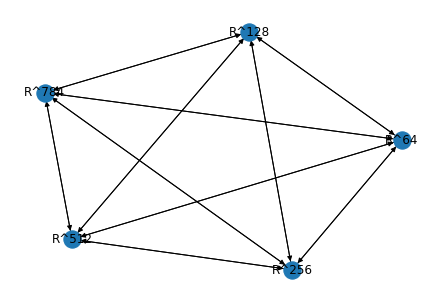

In [9]:
# build model architecture, then print to console
model = config.init_obj('arch', module_arch)
model.draw()

In [10]:
optimizer = pyro.optim.ReduceLROnPlateau({
    'optimizer': torch.optim.Adam,
    'optim_args': {
        "lr": 1e-4,
        "weight_decay": 0,
        "amsgrad": True
    },
    "patience": 20,
    "factor": 0.5,
    "verbose": True,
})

In [11]:
# optimizer = config.init_obj('optimizer', pyro.optim)

In [12]:
trainer = Trainer(model, [], optimizer, config=config,
                  data_loader=data_loader,
                  valid_data_loader=valid_data_loader,
                  lr_scheduler=optimizer)

In [13]:
trainer.train()

Train Epoch: 1 [0/54000 (0%)] Loss: 41894.992188
Train Epoch: 1 [4096/54000 (8%)] Loss: -9522.256836
Train Epoch: 1 [8192/54000 (15%)] Loss: 29017.179688
Train Epoch: 1 [12288/54000 (23%)] Loss: -29229.769531
Train Epoch: 1 [16384/54000 (30%)] Loss: -35152.195312
Train Epoch: 1 [20480/54000 (38%)] Loss: -52823.496094
Train Epoch: 1 [24576/54000 (46%)] Loss: -57761.617188
Train Epoch: 1 [28672/54000 (53%)] Loss: -78456.648438
Train Epoch: 1 [32768/54000 (61%)] Loss: -91714.476562
Train Epoch: 1 [36864/54000 (68%)] Loss: -93105.195312
Train Epoch: 1 [40960/54000 (76%)] Loss: -88335.968750
Train Epoch: 1 [45056/54000 (83%)] Loss: -130833.429688
Train Epoch: 1 [49152/54000 (91%)] Loss: -158482.375000
    epoch          : 1
    loss           : -58937.252324695124
    val_loss       : -136694.025390625
Train Epoch: 2 [0/54000 (0%)] Loss: -109107.351562
Train Epoch: 2 [4096/54000 (8%)] Loss: -163611.375000
Train Epoch: 2 [8192/54000 (15%)] Loss: -149721.203125
Train Epoch: 2 [12288/54000 (23